In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 90.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import  xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings
import math
from tqdm.auto import tqdm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point
from matplotlib import animation
from tqdm.auto import tqdm
from datetime import datetime,timedelta

from matplotlib.cm import get_cmap
warnings.filterwarnings("ignore")

# Combine Plot


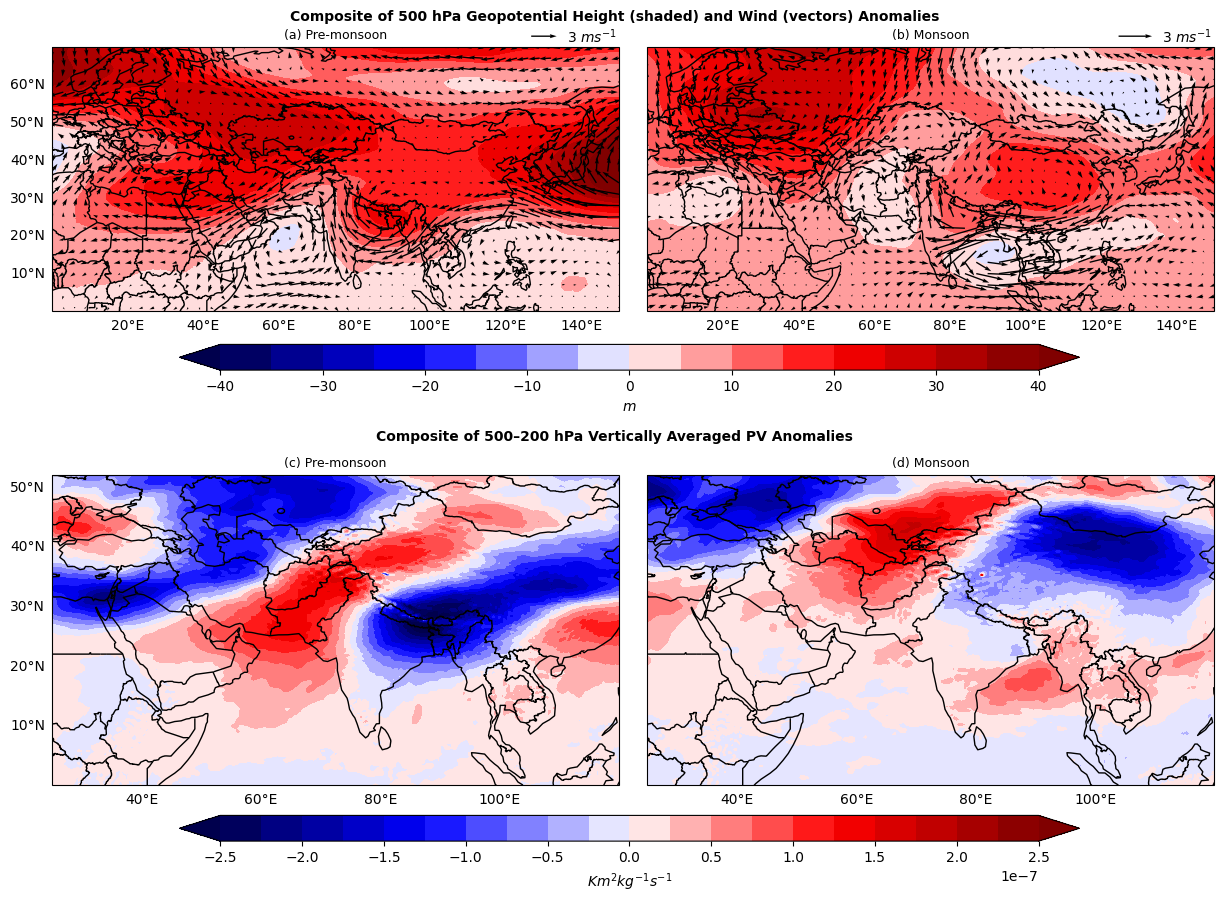

In [ ]:
projection=ccrs.PlateCarree()
fig,axes=plt.subplots(nrows=2, ncols=2,subplot_kw={'projection':projection},figsize=(15, 30))

#ght_wind
levels_ght=np.arange(-40, 40 + 1, 5)
# Plot mam
ax=axes[0,0]
# Data load
ght=xr.open_dataset(f'/content/drive/MyDrive/AP_HW/Scripts-ll/ght_wind/data/ght_events_anom-mam.nc')
wind=xr.open_dataset(f'/content/drive/MyDrive/AP_HW/Scripts-ll/ght_wind/data/wind_500_events_anom-mam.nc')

## Select Spatial region
# lat_range=slice(52,0)
# lon_range=slice(40,135)

# ght=ght.sel(latitude=lat_range,longitude=lon_range)
# wind=wind.sel(latitude=lat_range,longitude=lon_range)

ght_anom=ght.mean(dim='event_no',skipna=True)
wind_anom=wind.mean(dim='event_no',skipna=True)

latitude_ght=ght_anom['latitude'].values
longitude_ght=ght_anom['longitude'].values

wind_lat=wind_anom['latitude'].values
wind_lon=wind_anom['longitude'].values
u=wind_anom.u
v=wind_anom.v
stride=12
subsampled_u=u[::stride,::stride]
subsampled_v=v[::stride,::stride]
wind_lat_subsampled=wind_lat[::stride]
wind_lon_subsampled=wind_lon[::stride]

contourf=ax.contourf(longitude_ght,latitude_ght,ght_anom.z/9.8,levels=levels_ght,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")
quiver=ax.quiver(wind_lon_subsampled,wind_lat_subsampled,subsampled_u,subsampled_v,transform=ccrs.PlateCarree(),color='black')
quiver_key = ax.quiverkey(quiver, 0.89, 1.04, 3, r'3 ${ms^{-1}}$', labelpos='E', coordinates='axes')

ax.gridlines(draw_labels=['left','bottom'],visible=False)

ax.coastlines()
ax.set_title("(a) Pre-monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
# ax.set_title('(a)')

# Plot jjas
ax=axes[0,1]
# Data load
ght=xr.open_dataset(f'/content/drive/MyDrive/AP_HW/Scripts-ll/ght_wind/data/ght_events_anom-jjas.nc')
wind=xr.open_dataset(f'/content/drive/MyDrive/AP_HW/Scripts-ll/ght_wind/data/wind_500_events_anom-jjas.nc')

# # Spatial region
# lat_range=slice(52,0)
# lon_range=slice(25,120)

# ght=ght.sel(latitude=lat_range,longitude=lon_range)
# wind=wind.sel(latitude=lat_range,longitude=lon_range)

ght_anom=ght.mean(dim='event_no',skipna=True)
wind_anom=wind.mean(dim='event_no',skipna=True)

latitude_ght=ght_anom['latitude'].values
longitude_ght=ght_anom['longitude'].values

wind_lat=wind_anom['latitude'].values
wind_lon=wind_anom['longitude'].values
u=wind_anom.u
v=wind_anom.v
stride=12
subsampled_u=u[::stride,::stride]
subsampled_v=v[::stride,::stride]
wind_lat_subsampled=wind_lat[::stride]
wind_lon_subsampled=wind_lon[::stride]

contourf=ax.contourf(longitude_ght,latitude_ght,ght_anom.z/9.8,levels=levels_ght,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.01,fraction=0.06, label="${Pa}$")
quiver=ax.quiver(wind_lon_subsampled,wind_lat_subsampled,subsampled_u,subsampled_v,transform=ccrs.PlateCarree(),color='black')
quiver_key = ax.quiverkey(quiver, 0.89, 1.04, 3, r'3 ${ms^{-1}}$', labelpos='E', coordinates='axes')


ax.gridlines(draw_labels=['bottom'],visible=False)

ax.coastlines()
ax.set_title("(b) Monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
# ax.set_title('(b)')


# colorbar for both subplots
cbar = plt.colorbar(contourf, ax=axes[0,:], orientation='horizontal', pad=0.01, fraction=0.02, aspect=35, label="${m}$")
cbar.set_ticks(levels_ght[::2])  # colorbar ticks
#  colorbar position
cbar.ax.set_position([0.21, 0.232, 0.6, 0.025]) # [left, bottom, width, height]
fig.text(0.5, 0.365, "Composite of 500 hPa Geopotential Height (shaded) and Wind (vectors) Anomalies", ha='center', fontsize=10, fontweight='bold')

# pv
levels_pv = np.arange(-2.5e-7, 2.5e-7 + 0.05e-7, 0.25e-7)

#mam
ax=axes[1,0]
pv=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/pv/data/pv_level_avg_anom-mam.nc')

# lat_range=slice(52,0)
# lon_range=slice(25,120)
# pv=pv.sel(latitude=lat_range,longitude=lon_range)
pv=pv.mean(dim='event_no',skipna=True)

latitude=pv['latitude'].values
longitude=pv['longitude'].values
contourf=ax.contourf(longitude,latitude,pv.pv,levels=levels_pv,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05,fraction=0.05, label="${K} {m}^2 {kg}^{-1} {s}^{-1}$")

ax.coastlines()
ax.set_title("(c) Pre-monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
ax.gridlines(draw_labels=['left','bottom'],visible=False)


#jjas
ax=axes[1,1]
pv=xr.open_dataset('/content/drive/MyDrive/AP_HW/Scripts-ll/pv/data/pv_level_avg_anom-jjas.nc')

# lat_range=slice(52,0)
# lon_range=slice(25,120)
pv=pv.mean(dim='event_no',skipna=True)

latitude=pv['latitude'].values
longitude=pv['longitude'].values
contourf=ax.contourf(longitude,latitude,pv.pv,levels=levels_pv,cmap='seismic',extend='both',transform=projection)
# cbar = plt.colorbar(contourf, ax=ax, orientation='horizontal', pad=0.05,fraction=0.05, label="${K} {m}^2 {kg}^{-1} {s}^{-1}$")

ax.coastlines()
ax.set_title("(d) Monsoon",fontsize=9)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.add_feature(cf.BORDERS.with_scale('10m'))
ax.gridlines(draw_labels=['bottom'],visible=False)


# colorbar for both subplots
cbar = plt.colorbar(contourf, ax=axes[1,:], orientation='horizontal', pad=0.01, fraction=0.02, aspect=35, label="${K}{m}^{2}{kg}^{-1} s^{-1}$")
cbar.set_ticks(levels_pv[::2])
# colorbar position
cbar.ax.set_position([0.21, 0.075, 0.6, 0.025]) # [left, bottom, width, height]
fig.text(0.5, 0.225, "Composite of 500–200 hPa Vertically Averaged PV Anomalies", ha='center', fontsize=10, fontweight='bold')

plt.subplots_adjust( wspace=0.05,hspace=-0.75,top=0.9)

plt.show()